# Project 7, Random numbers generation
## Oliver Walton

There are two main types of random numbers are True random number generators (TRNG) and psudo random number generators (PRNG)

True random numbers are exactly as they sound, and are meant to be as unpredictable as possible.

Psudorandom numbers are meant to seem random to a human audience, and although its result is more predictable, it makes duplicates more rare and thus seem more random.

## True Random Numbers

Generating a random number depends on two factors, how chaotic the system is that generates the number, and the seed from which that number is generated.

For example, from lecture 13, we used this equaiton

x' = (ax + c) mod m

Which gave very chaotic results when given seeding variables a, c, and m.


In [7]:
# find a random number between 0 and 5

x = 1
a = 16807
c = 0
m = 2**31 -1

for i in range(10):
    x = (a*x + c)%m
    print(x%6)

1
1
5
2
4
2
0
2
5
1


### Optaining random seeds

Having something give chaotic results is not super hard, however getting a truly random seed from which to produce the results is a much greater task.

To achive this, a random occurance in the physical world is usally used. A very common and easily achievable way to do this is to use time as a seed. by taking into account the year, month, day, hour, and seconds, a unique seed can be generated so long as any amount of time has passed inbetween number generations.

Issues with this method could occur by using time when it is important that the seed can not be guessed, such as in cryptography. Cryptography has the issue that the seeds need to be random and varied enough that someone with a fast computer could not attempt every seed possible in a resonable amount of time. An interesting physical version of this is the Enigma Machine from WWII.

The enigma mahcine

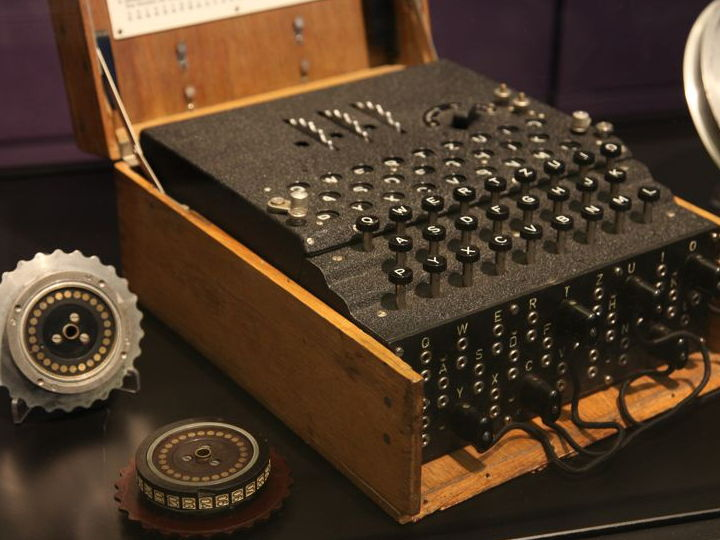

The Enigma Machine was used in WWII to encode German messages, and is existence is what lead to some of the first computers being created in an attempt to decode these messages. The machine encoded messages, by starting at some specific seed, then, everytime a letter was typed, a light lit up to indicate what should be written. The person who was meant to receve this message would then just set the seed of their own machine to the same as the sender, then type the encoded message, getting the decoded message back.

In total there were 1.58e20 different settings that the machine could be set to, and as these seeds did not relate to eachother like how time seeds do. This means that it is nearly impossible to decode the messages.

However the Enigma Machine had a single flaw, that is that whenever a letter was typed, the encoded letter would never be the same as the typed letter (i.e. I type the letter 'c' I can never get the letter 'c' back, I will get one of the other 25 letters). With this single oversight, the machine was not truly random, but slightly pseudorandom.

## Pseudorandom Numbers

Pseudorandom number generators are meant to emulate something random to a human audience.

For example, if a person were to flip a coin in real life 10 times (assuming flipping a coin is a true 50/50) there is a 0.1% chance that they would get heads all 10 times. However if a person used a computer that just so happend to virtually flip a coin perfectly randomly and that person was lucky enough to get 10 heads in a row, they would just think that the computer is not random. To solve this, programmers artificually change the percent chance for an event to occur.  

### DOTA2 example

Something I have experienced where true randomness was considered an issue was in the modern video game DOTA2, where when I first started playing it used a TRNG system but later swiched to a PRNG system. This made the gameplay much more enjoyable for characters that used a lot of randomness.

One such character is named Phantom Assasin (PA). Her main ability makes it so that whenever she attacks there is a 15% chance that she will crit for 5.5 times damage. So lets compare TRNG vs. PRNG for PA's attacks

In [141]:
import numpy as np
import pandas as pd
# Lets say that in an average game PA will attack 100 times

trng = []
prng = []

tnumcrits = 0
#TRNG array
for i in range(100):
    if(np.random.randint(1,101) <= 15):
        trng.append("CRIT!!!")
        tnumcrits += 1 #used to test accuracy
    else:
        trng.append("hit")
# print(trng)

#PRNG array
#note that 100/15 = 6.66
# so i am going to round and say that the 4th hit should be 
#exactly 15 percent.

pnumcrits = 0
noncrits = 1
for j in range(1, 101):   
    if(np.random.randint(1,101) <= ((15)**(1/4))**noncrits):
        prng.append("CRIT!!!")
        noncrits = 1
        pnumcrits += 1 #used to test accuracy
    else:
        prng.append("hit")
        noncrits += 1
# print(prng)

# print("TRNG accuracy = ", tnumcrits/100)
# print("PRNG accuracy = ", pnumcrits/100)

d = {'TRNG': trng, 'PRNG': prng}
pd.set_option('display.max_rows', None)
df = pd.DataFrame(data=d)
df.index += 1
df

,TRNG,PRNG
1,hit,hit
2,hit,hit
3,hit,hit
4,hit,hit
5,hit,CRIT!!!
6,hit,hit
7,hit,hit
8,hit,hit
9,hit,hit
10,CRIT!!!,hit


In [132]:
tnumcrits = 0
#TRNG array
for i in range(10000):
    if(np.random.randint(1,101) <= 15):
#         trng.append("CRIT!!!")
        tnumcrits += 1 #used to test accuracy
#     else:
#         trng.append("hit")
# print(trng)

#PRNG array
#note that 100/15 = 6.66
# so i am going to round and say that the 4th hit should be 
#exactly 15 percent.

pnumcrits = 0
noncrits = 1
for j in range(1, 10001):   
    if(np.random.randint(1,101) <= ((15)**(1/4))**noncrits):
#         prng.append("CRIT!!!")
        noncrits = 1
        pnumcrits += 1 #used to test accuracy
    else:
#         prng.append("hit")
        noncrits += 1
# print(prng)

print("TRNG accuracy = ", tnumcrits/100)
print("PRNG accuracy = ", pnumcrits/100)

TRNG accuracy =  15.25
PRNG accuracy =  18.45


So as can be seen, because we decided to round up by using $(15^{1/4})^n$ instead of rounding down by using $(15^{1/5})^n$. A possible fix to this issue would be to altrnate between rounding up and rounding down so that the average acuracy would be closer to 15%.

True random number generators and pseudorandom numbers generators both have very important roles in modern computers, and if the randomness is out in the open, it may be possible that what you are seeing is not true randomness.